In [1]:
import pandas as pd
import torch
data = pd.read_csv("/Users/zhuang0403/AI model/瑞煌/heart_disease.csv")
data = data.dropna()

In [2]:
#random select 80% of the data
data = data.sample(frac = 0.4, random_state = 1)
train = data.sample(frac=0.8, random_state=1)  # Sample 80% for training
test = data.drop(train.index)  # Remove the sampled rows for test data

In [3]:
new_data = train.drop(columns=["HeartDiseaseorAttack"])
data_result = train["HeartDiseaseorAttack"].to_frame() ##.to_frame()

In [4]:
new_data.head(3)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
47233,1.0,0.0,1.0,39.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,4.0,15.0,3.0,1.0,0.0,10.0,4.0,4.0
155802,1.0,1.0,1.0,21.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,12.0,2.0,1.0
31110,1.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,2.0,5.0,0.0,0.0,1.0,8.0,4.0,1.0


In [5]:
data_result.head(3)

,HeartDiseaseorAttack
47233,0.0
155802,1.0
31110,0.0


In [6]:
tensor_data = torch.tensor(new_data.values).to(torch.float32)
print(tensor_data.size())
test_data = torch.tensor(test.drop(columns=["HeartDiseaseorAttack"]).values).to(torch.float32)
print(test_data.size())

torch.Size([81178, 21])
torch.Size([20294, 21])


In [7]:
tensor_result = torch.tensor(data_result.values).to(torch.float32)
print(tensor_result.size())
test_result = torch.tensor(test["HeartDiseaseorAttack"].to_frame().values).to(torch.float32)
print(test_result.size())

torch.Size([81178, 1])
torch.Size([20294, 1])


In [8]:
#data preprocessing
import numpy as np
new_data /= np.std(new_data, axis=0)

In [9]:
N = new_data.shape[0] #row
D_in = new_data.shape[1] #feature
#hidden nodes
H = 16
D_out = 1

#Initial weight: small random 要放哪
w = 0.01* np.random.randn(D_in, D_out)
w = torch.tensor(w, dtype=torch.float32)

In [10]:
#Activation, Dropout(不要有比較好)
##Relu
model1 = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    #torch.nn.Dropout(0.2)
)

In [11]:
#shape調整
# y_predict = model1(tensor_data)
# print(y_predict.size())
# tensor_result = tensor_result.view((len(y_predict), 1))
# print(tensor_result.size())

In [12]:
learning_rate = 0.01
epochs = 1000
#L2 regularization weight_decay=1e-5
optimizer = torch.optim.Adam(model1.parameters(), lr = learning_rate,weight_decay=1e-5) #weight_decay=1e-5

#learning rate decay
#scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)

In [13]:
print(model1(tensor_data))
print(tensor_result)
import numpy as np
abs_diff = torch.abs(model1(tensor_data) - tensor_result)
sum_abs_diff = torch.sum(abs_diff)
print(sum_abs_diff)

tensor([[-1.4714],
        [-1.9066],
        [-0.9535],
        ...,
        [-0.7810],
        [-1.0707],
        [-0.9747]], grad_fn=<AddmmBackward0>)
tensor([[0.],
        [1.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])
tensor(76018.8281, grad_fn=<SumBackward0>)


epoch 1, loss = 0.45576683, lr = 0.012000
epoch 2, loss = 0.37396631, lr = 0.014400
epoch 3, loss = 0.35419399, lr = 0.017280
epoch 4, loss = 0.35896173, lr = 0.013824
epoch 5, loss = 0.35649368, lr = 0.016589
epoch 6, loss = 0.34243354, lr = 0.019907
epoch 7, loss = 0.32177836, lr = 0.023888
epoch 8, loss = 0.31562924, lr = 0.028665
epoch 9, loss = 0.32914308, lr = 0.022932
epoch 10, loss = 0.32901847, lr = 0.027519
epoch 11, loss = 0.31518877, lr = 0.033023
epoch 12, loss = 0.29980671, lr = 0.039627
epoch 13, loss = 0.29844135, lr = 0.047553
epoch 14, loss = 0.29730496, lr = 0.057063
epoch 15, loss = 0.29056436, lr = 0.068476
epoch 16, loss = 0.28701904, lr = 0.082171
epoch 17, loss = 0.28503126, lr = 0.098605
epoch 18, loss = 0.27961791, lr = 0.118326
epoch 19, loss = 0.27224264, lr = 0.141991
epoch 20, loss = 0.26796192, lr = 0.170389
epoch 21, loss = 0.26280057, lr = 0.204467
epoch 22, loss = 0.26262921, lr = 0.245361
epoch 23, loss = 0.26273450, lr = 0.196289
epoch 24, loss = 0.2

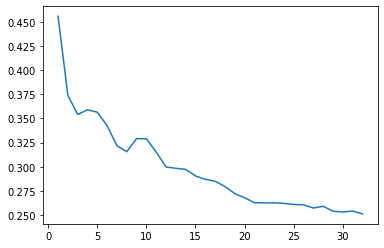

In [14]:
import matplotlib.pyplot as plt
lossValue = []
epochValue = []
#weight_tuning_LG
epoch = 0

previous = 10000000000.0

loss_criterion = 30000

while True:
    y_predict = model1(tensor_data)
    y_pre = torch.sigmoid(y_predict)
    
    loss_function = torch.nn.BCELoss()
    loss = loss_function(y_pre, tensor_result)
    
    
    abs_diff = torch.abs(model1(tensor_data) - tensor_result)
    sum_abs_diff = torch.sum(abs_diff)
    #print(sum_abs_diff)
    
    if (sum_abs_diff < loss_criterion):
        print("acceptable SLFN")
        break
    else:
        
    
        #weight_tuning_LG
        if(loss.item()<0.25):
            print("Meet the stopping criterion, an acceptable SLFN")
            break
    
    
    
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()
    
        #scheduler.step()
    
        #舊的loss function跟 新的loss function做比較
        if(loss.item()<previous):
            optimizer.param_groups[0]["lr"] = optimizer.param_groups[0]["lr"]*1.2
        else:
            #learning rate做比較
            if(optimizer.param_groups[0]["lr"]>0.001):
                optimizer.param_groups[0]["lr"] = optimizer.param_groups[0]["lr"]*0.8
            else:
                print("An unacceptable SLFN")
                break
    
        previous = loss.item()
    
        epoch += 1
    
    print(f'epoch {epoch}, loss = {loss.item():.8f}, lr = {optimizer.param_groups[0]["lr"]:.6f}')
    lossValue.append(loss.item())
    epochValue.append(epoch)

plt.plot(epochValue,lossValue)

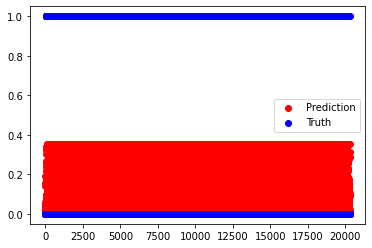

In [15]:
import matplotlib.pyplot as plt
y_predict1 = model1(test_data)
y_predict1 = torch.sigmoid(y_predict1)  # 將預測結果應用 sigmoid 函數
plt.scatter(range(len(y_predict1)), y_predict1.detach().numpy(), c='r', label='Prediction')  # 預測結果
plt.scatter(range(len(test_result)), test_result.detach().numpy(), c='b', label='Truth')  # 正確答案
plt.legend()
plt.show()

In [16]:
i = 0
for y, yhat in zip(tensor_result, torch.sigmoid(model1(tensor_data))):
    if(torch.abs(y - yhat) >= 0.45):
        i += 1
        
    #if(torch.abs(y - yhat) < )
    #print(y - yhat)
    #print(torch.abs(y - yhat))
print(i)  

7629


In [17]:
# import matplotlib.pyplot as plt
# print(tensor_result)
# print(y_pre)
# plt.plot(tensor_result.detach().numpy())
# plt.plot(y_pre.detach().numpy())

In [18]:
import numpy as np

In [19]:
import torch
import numpy as np

zeta = 0.001
i = 0  # Count of adjustments
k = 0  # Index

for y, yhat in zip(tensor_result, torch.sigmoid(model1(tensor_data))):
    if torch.abs(y - yhat) >= 0.45:
        i += 1
        gamma = np.random.randint(1, 11, size=(1, D_in))
        a = np.sqrt(np.sum(np.square(gamma)))  # Length = 1
        gamma = gamma / a  # Normalize gamma
        gamma_t = gamma.T
        
        Xc = tensor_data[[j for j in range(tensor_data.size(0)) if j != k]]  # Select Xc excluding k

        for j in range(Xc.size(0)):
            data_j = Xc[j]
            data_k = tensor_data[k]
            isolating1 = np.dot(data_j - data_k, gamma_t) * zeta
            isolating2 = (zeta + isolating1) * (zeta - isolating1)
            print("isolating1:", isolating1)

            if isolating1 != 0 and isolating2 < 0:
                print("something equals to zero")
                break
            else:
                gamma = np.random.randint(1, 11, size=(1, D_in))
                a = np.sqrt(np.sum(np.square(gamma)))  # Length = 1
                gamma = gamma / a  # Normalize gamma
                gamma_t = gamma.T

    k += 1  
    
print("i:", i)
    

gamma_t = gamma.T
# Xc - Xk

isolating1: [0.01013977]
something equals to zero
isolating1: [0.01005707]
something equals to zero
isolating1: [0.00741451]
something equals to zero
isolating1: [0.00369607]
something equals to zero
isolating1: [0.00638905]
something equals to zero
isolating1: [0.0024207]
something equals to zero
isolating1: [0.00340468]
something equals to zero
isolating1: [-0.00468874]
something equals to zero
isolating1: [0.00574612]
something equals to zero
isolating1: [0.00687548]
something equals to zero
isolating1: [0.00553392]
something equals to zero
isolating1: [0.00482562]
something equals to zero
isolating1: [0.00213936]
something equals to zero
isolating1: [-0.00875778]
something equals to zero
isolating1: [0.01396009]
something equals to zero
isolating1: [0.00136341]
something equals to zero
isolating1: [0.00493388]
something equals to zero
isolating1: [0.00612917]
something equals to zero
isolating1: [-0.00057835]
isolating1: [-0.00638883]
something equals to zero
isolating1: [0.0042016

isolating1: [0.00537216]
something equals to zero
isolating1: [0.00373378]
something equals to zero
isolating1: [0.00642879]
something equals to zero
isolating1: [0.00299523]
something equals to zero
isolating1: [0.00681797]
something equals to zero
isolating1: [0.00716406]
something equals to zero
isolating1: [0.0080196]
something equals to zero
isolating1: [0.00463255]
something equals to zero
isolating1: [0.00052223]
isolating1: [-0.0005661]
isolating1: [-0.00246826]
something equals to zero
isolating1: [0.00387057]
something equals to zero
isolating1: [0.00709482]
something equals to zero
isolating1: [0.00578621]
something equals to zero
isolating1: [0.00046048]
isolating1: [-0.00183948]
something equals to zero
isolating1: [0.01074999]
something equals to zero
isolating1: [0.00614038]
something equals to zero
isolating1: [0.0058728]
something equals to zero
isolating1: [0.00563545]
something equals to zero
isolating1: [0.00024152]
isolating1: [-0.00079029]
isolating1: [-0.00470605

isolating1: [0.00396496]
something equals to zero
isolating1: [0.00276464]
something equals to zero
isolating1: [-0.0057104]
something equals to zero
isolating1: [0.00172045]
something equals to zero
isolating1: [0.01137502]
something equals to zero
isolating1: [0.00948355]
something equals to zero
isolating1: [0.00263117]
something equals to zero
isolating1: [0.00163526]
something equals to zero
isolating1: [0.00730167]
something equals to zero
isolating1: [0.00602606]
something equals to zero
isolating1: [-0.00283827]
something equals to zero
isolating1: [0.00533979]
something equals to zero
isolating1: [0.00245799]
something equals to zero
isolating1: [0.00706038]
something equals to zero
isolating1: [0.00287437]
something equals to zero
isolating1: [0.00645394]
something equals to zero
isolating1: [0.00222424]
something equals to zero
isolating1: [-0.00774659]
something equals to zero
isolating1: [0.00535342]
something equals to zero
isolating1: [0.00906667]
something equals to zer

isolating1: [0.00529946]
something equals to zero
isolating1: [0.00289128]
something equals to zero
isolating1: [0.00051586]
isolating1: [0.00140913]
something equals to zero
isolating1: [-0.00568895]
something equals to zero
isolating1: [-0.00284134]
something equals to zero
isolating1: [-0.0011959]
something equals to zero
isolating1: [0.00121197]
something equals to zero
isolating1: [0.0019984]
something equals to zero
isolating1: [-0.00490672]
something equals to zero
isolating1: [0.00463857]
something equals to zero
isolating1: [0.00811864]
something equals to zero
isolating1: [0.00290641]
something equals to zero
isolating1: [-0.00027669]
isolating1: [-0.00184615]
something equals to zero
isolating1: [0.00283552]
something equals to zero
isolating1: [0.00156048]
something equals to zero
isolating1: [-0.00951649]
something equals to zero
isolating1: [0.00917778]
something equals to zero
isolating1: [0.00790569]
something equals to zero
isolating1: [0.00189076]
something equals to 

isolating1: [0.00673229]
something equals to zero
isolating1: [-0.00174697]
something equals to zero
isolating1: [-0.00131271]
something equals to zero
isolating1: [0.0059005]
something equals to zero
isolating1: [0.00575323]
something equals to zero
isolating1: [-0.00011722]
isolating1: [-0.00015195]
isolating1: [-0.00724504]
something equals to zero
isolating1: [0.00264379]
something equals to zero
isolating1: [0.00628894]
something equals to zero
isolating1: [-0.00225091]
something equals to zero
isolating1: [0.0066786]
something equals to zero
isolating1: [0.00888]
something equals to zero
isolating1: [-0.00282739]
something equals to zero
isolating1: [0.00303811]
something equals to zero
isolating1: [-0.00474108]
something equals to zero
isolating1: [0.00750417]
something equals to zero
isolating1: [0.00315291]
something equals to zero
isolating1: [-0.00279177]
something equals to zero
isolating1: [0.00298487]
something equals to zero
isolating1: [0.00093201]
isolating1: [0.002282

isolating1: [0.00273482]
something equals to zero
isolating1: [-0.00129524]
something equals to zero
isolating1: [0.00436648]
something equals to zero
isolating1: [0.00289176]
something equals to zero
isolating1: [0.00204486]
something equals to zero
isolating1: [0.00630866]
something equals to zero
isolating1: [0.00423971]
something equals to zero
isolating1: [0.00392281]
something equals to zero
isolating1: [-0.00161529]
something equals to zero
isolating1: [-0.00111494]
something equals to zero
isolating1: [-0.00386568]
something equals to zero
isolating1: [0.00286021]
something equals to zero
isolating1: [0.00342384]
something equals to zero
isolating1: [0.000102]
isolating1: [-0.00622257]
something equals to zero
isolating1: [0.00123613]
something equals to zero
isolating1: [0.00497561]
something equals to zero
isolating1: [0.00803358]
something equals to zero
isolating1: [0.00109246]
something equals to zero
isolating1: [0.00366198]
something equals to zero
isolating1: [0.0031177

isolating1: [0.00851948]
something equals to zero
isolating1: [0.00440534]
something equals to zero
isolating1: [0.00333596]
something equals to zero
isolating1: [0.00452025]
something equals to zero
isolating1: [-0.00227428]
something equals to zero
isolating1: [0.00558482]
something equals to zero
isolating1: [0.00184177]
something equals to zero
isolating1: [0.00980609]
something equals to zero
isolating1: [0.00186987]
something equals to zero
isolating1: [0.00268765]
something equals to zero
isolating1: [0.00264334]
something equals to zero
isolating1: [0.00701639]
something equals to zero
isolating1: [-0.00101211]
something equals to zero
isolating1: [0.00653197]
something equals to zero
isolating1: [0.00640705]
something equals to zero
isolating1: [0.00783168]
something equals to zero
isolating1: [-0.0017191]
something equals to zero
isolating1: [0.00660919]
something equals to zero
isolating1: [0.0036859]
something equals to zero
isolating1: [0.00597202]
something equals to zero

isolating1: [0.00703385]
something equals to zero
isolating1: [-0.002661]
something equals to zero
isolating1: [0.0036376]
something equals to zero
isolating1: [0.00292409]
something equals to zero
isolating1: [0.00039559]
isolating1: [9.62745816e-05]
isolating1: [-0.00957673]
something equals to zero
isolating1: [0.00266151]
something equals to zero
isolating1: [0.00053215]
isolating1: [0.00379497]
something equals to zero
isolating1: [0.00223938]
something equals to zero
isolating1: [0.00429413]
something equals to zero
isolating1: [0.00719486]
something equals to zero
isolating1: [0.0038522]
something equals to zero
isolating1: [0.0045857]
something equals to zero
isolating1: [0.00264809]
something equals to zero
isolating1: [0.00453987]
something equals to zero
isolating1: [0.00180265]
something equals to zero
isolating1: [0.0029356]
something equals to zero
isolating1: [0.00304178]
something equals to zero
isolating1: [0.00169067]
something equals to zero
isolating1: [0.00841767]


isolating1: [0.01155855]
something equals to zero
isolating1: [0.0037491]
something equals to zero
isolating1: [0.00517785]
something equals to zero
isolating1: [0.00341875]
something equals to zero
isolating1: [0.00168676]
something equals to zero
isolating1: [0.00394421]
something equals to zero
isolating1: [0.00575124]
something equals to zero
isolating1: [0.00492004]
something equals to zero
isolating1: [0.00391687]
something equals to zero
isolating1: [0.00145872]
something equals to zero
isolating1: [0.005151]
something equals to zero
isolating1: [0.00361331]
something equals to zero
isolating1: [0.00762468]
something equals to zero
isolating1: [0.00126025]
something equals to zero
isolating1: [0.00401677]
something equals to zero
isolating1: [0.00726074]
something equals to zero
isolating1: [0.00699834]
something equals to zero
isolating1: [-0.00192123]
something equals to zero
isolating1: [0.00172488]
something equals to zero
isolating1: [-0.00264363]
something equals to zero
i

isolating1: [0.00605773]
something equals to zero
isolating1: [-0.00021864]
isolating1: [-0.00206548]
something equals to zero
isolating1: [0.0058]
something equals to zero
isolating1: [-0.00242336]
something equals to zero
isolating1: [0.00022207]
isolating1: [0.00372635]
something equals to zero
isolating1: [0.00526747]
something equals to zero
isolating1: [0.00649519]
something equals to zero
isolating1: [0.00120402]
something equals to zero
isolating1: [0.00854294]
something equals to zero
isolating1: [0.00077444]
isolating1: [0.00193441]
something equals to zero
isolating1: [0.00778801]
something equals to zero
isolating1: [0.0036723]
something equals to zero
isolating1: [0.00586183]
something equals to zero
isolating1: [-0.00385576]
something equals to zero
isolating1: [0.00813681]
something equals to zero
isolating1: [0.0051866]
something equals to zero
isolating1: [0.00472918]
something equals to zero
isolating1: [0.00850483]
something equals to zero
isolating1: [0.00556497]
so

isolating1: [-0.00447214]
something equals to zero
isolating1: [0.00303885]
something equals to zero
isolating1: [-0.00328761]
something equals to zero
isolating1: [0.00340863]
something equals to zero
isolating1: [0.00201957]
something equals to zero
isolating1: [0.00224433]
something equals to zero
isolating1: [-0.00245803]
something equals to zero
isolating1: [0.00066883]
isolating1: [-0.0026808]
something equals to zero
isolating1: [-0.00103495]
something equals to zero
isolating1: [0.00301511]
something equals to zero
isolating1: [0.00046512]
isolating1: [-0.00927944]
something equals to zero
isolating1: [-0.00237542]
something equals to zero
isolating1: [0.00023886]
isolating1: [-0.00572724]
something equals to zero
isolating1: [0.00290929]
something equals to zero
isolating1: [0.00977053]
something equals to zero
isolating1: [0.00568738]
something equals to zero
isolating1: [0.00269492]
something equals to zero
isolating1: [0.00369787]
something equals to zero
isolating1: [0.007

isolating1: [0.00651911]
something equals to zero
isolating1: [-0.00453541]
something equals to zero
isolating1: [0.00311562]
something equals to zero
isolating1: [0.00733213]
something equals to zero
isolating1: [0.00292273]
something equals to zero
isolating1: [0.00202232]
something equals to zero
isolating1: [0.00513069]
something equals to zero
isolating1: [0.00151941]
something equals to zero
isolating1: [0.00311396]
something equals to zero
isolating1: [0.00326987]
something equals to zero
isolating1: [-0.00511461]
something equals to zero
isolating1: [-0.01270475]
something equals to zero
isolating1: [-0.00610535]
something equals to zero
isolating1: [0.00261604]
something equals to zero
isolating1: [0.00669635]
something equals to zero
isolating1: [0.00596739]
something equals to zero
isolating1: [0.00086044]
isolating1: [-0.00126808]
something equals to zero
isolating1: [-0.00124289]
something equals to zero
isolating1: [0.00717668]
something equals to zero
isolating1: [0.0090

isolating1: [0.00092515]
isolating1: [0.00089856]
isolating1: [-0.01091825]
something equals to zero
isolating1: [0.00476148]
something equals to zero
isolating1: [0.00206897]
something equals to zero
isolating1: [-0.00169081]
something equals to zero
isolating1: [0.00350711]
something equals to zero
isolating1: [0.00395087]
something equals to zero
isolating1: [-0.00342422]
something equals to zero
isolating1: [0.00383426]
something equals to zero
isolating1: [0.00402468]
something equals to zero
isolating1: [0.00432875]
something equals to zero
isolating1: [-0.00014665]
isolating1: [-0.00941582]
something equals to zero
isolating1: [-0.00181548]
something equals to zero
isolating1: [-0.00820698]
something equals to zero
isolating1: [0.00545942]
something equals to zero
isolating1: [0.00205919]
something equals to zero
isolating1: [0.0055443]
something equals to zero
isolating1: [0.00275744]
something equals to zero
isolating1: [-0.01487716]
something equals to zero
isolating1: [0.006

isolating1: [0.00554858]
something equals to zero
isolating1: [-0.00060005]
isolating1: [0.00280278]
something equals to zero
isolating1: [0.00552711]
something equals to zero
isolating1: [0.00421857]
something equals to zero
isolating1: [0.00506172]
something equals to zero
isolating1: [0.00625506]
something equals to zero
isolating1: [0.00430473]
something equals to zero
isolating1: [0.00501479]
something equals to zero
isolating1: [0.00893413]
something equals to zero
isolating1: [0.00450059]
something equals to zero
isolating1: [-0.00863019]
something equals to zero
isolating1: [0.00975622]
something equals to zero
isolating1: [0.00327516]
something equals to zero
isolating1: [0.0033]
something equals to zero
isolating1: [0.00483286]
something equals to zero
isolating1: [0.00853474]
something equals to zero
isolating1: [0.00425628]
something equals to zero
isolating1: [0.00085398]
isolating1: [0.00048651]
isolating1: [-0.0031406]
something equals to zero
isolating1: [0.00177775]
so

isolating1: [0.0050636]
something equals to zero
isolating1: [0.00183504]
something equals to zero
isolating1: [0.00336692]
something equals to zero
isolating1: [0.00616983]
something equals to zero
isolating1: [-0.00320156]
something equals to zero
isolating1: [0.0064671]
something equals to zero
isolating1: [0.00158432]
something equals to zero
isolating1: [0.0084836]
something equals to zero
isolating1: [0.00625156]
something equals to zero
isolating1: [0.00765158]
something equals to zero
isolating1: [0.00235975]
something equals to zero
isolating1: [-0.00073425]
isolating1: [-0.00041023]
isolating1: [-0.00444444]
something equals to zero
isolating1: [0.00594755]
something equals to zero
isolating1: [-0.00239317]
something equals to zero
isolating1: [0.00364968]
something equals to zero
isolating1: [0.0012055]
something equals to zero
isolating1: [-0.00071383]
isolating1: [-0.00824485]
something equals to zero
isolating1: [0.00615626]
something equals to zero
isolating1: [0.0043357

isolating1: [0.00538614]
something equals to zero
isolating1: [0.01128541]
something equals to zero
isolating1: [0.00579506]
something equals to zero
isolating1: [-0.00532678]
something equals to zero
isolating1: [0.00093048]
isolating1: [-0.00094437]
isolating1: [-0.00183086]
something equals to zero
isolating1: [0.00464493]
something equals to zero
isolating1: [-0.00931534]
something equals to zero
isolating1: [-0.00692193]
something equals to zero
isolating1: [0.00371432]
something equals to zero
isolating1: [0.00653029]
something equals to zero
isolating1: [0.00567224]
something equals to zero
isolating1: [-0.00825283]
something equals to zero
isolating1: [0.00448614]
something equals to zero
isolating1: [0.0034125]
something equals to zero
isolating1: [0.0025658]
something equals to zero
isolating1: [-0.00142943]
something equals to zero
isolating1: [-0.00740969]
something equals to zero
isolating1: [0.00527918]
something equals to zero
isolating1: [0.00951815]
something equals to

isolating1: [-0.00095542]
isolating1: [-0.00427814]
something equals to zero
isolating1: [0.00291373]
something equals to zero
isolating1: [0.00466202]
something equals to zero
isolating1: [0.00347105]
something equals to zero
isolating1: [0.00348053]
something equals to zero
isolating1: [0.00138772]
something equals to zero
isolating1: [0.00738822]
something equals to zero
isolating1: [0.00708872]
something equals to zero
isolating1: [0.00277336]
something equals to zero
isolating1: [0.00432092]
something equals to zero
isolating1: [0.00443583]
something equals to zero
isolating1: [-0.00045942]
isolating1: [-0.00280184]
something equals to zero
isolating1: [0.00178246]
something equals to zero
isolating1: [0.01075874]
something equals to zero
isolating1: [0.00395351]
something equals to zero
isolating1: [0.0064375]
something equals to zero
isolating1: [0.00608873]
something equals to zero
isolating1: [0.0056248]
something equals to zero
isolating1: [0.00477262]
something equals to zer

isolating1: [0.00116844]
something equals to zero
isolating1: [0.00783044]
something equals to zero
isolating1: [0.00399369]
something equals to zero
isolating1: [0.0022748]
something equals to zero
isolating1: [-0.00375317]
something equals to zero
isolating1: [0.00597835]
something equals to zero
isolating1: [-0.00689413]
something equals to zero
isolating1: [0.00403058]
something equals to zero
isolating1: [-0.00752129]
something equals to zero
isolating1: [0.00478983]
something equals to zero
isolating1: [0.00517116]
something equals to zero
isolating1: [0.00629008]
something equals to zero
isolating1: [0.00373526]
something equals to zero
isolating1: [0.00439813]
something equals to zero
isolating1: [0.00288003]
something equals to zero
isolating1: [0.00605021]
something equals to zero
isolating1: [0.00547575]
something equals to zero
isolating1: [0.00537126]
something equals to zero
isolating1: [0.00549912]
something equals to zero
isolating1: [-0.01212729]
something equals to ze

isolating1: [0.0052614]
something equals to zero
isolating1: [0.00803571]
something equals to zero
isolating1: [-0.00351933]
something equals to zero
isolating1: [-0.00221562]
something equals to zero
isolating1: [0.0063745]
something equals to zero
isolating1: [0.00138592]
something equals to zero
isolating1: [-0.00140183]
something equals to zero
isolating1: [-0.00278927]
something equals to zero
isolating1: [0.00879145]
something equals to zero
isolating1: [0.00755398]
something equals to zero
isolating1: [0.00245501]
something equals to zero
isolating1: [0.00804668]
something equals to zero
isolating1: [0.00705475]
something equals to zero
isolating1: [0.00790082]
something equals to zero
isolating1: [-0.01223472]
something equals to zero
isolating1: [-0.00188601]
something equals to zero
isolating1: [-0.00526977]
something equals to zero
isolating1: [0.00616747]
something equals to zero
isolating1: [0.00460781]
something equals to zero
isolating1: [0.00410101]
something equals to 

isolating1: [0.00171849]
something equals to zero
isolating1: [-0.00129437]
something equals to zero
isolating1: [0.00852359]
something equals to zero
isolating1: [0.00442495]
something equals to zero
isolating1: [0.00111631]
something equals to zero
isolating1: [0.00510399]
something equals to zero
isolating1: [-0.00205436]
something equals to zero
isolating1: [-0.0003539]
isolating1: [-0.00653357]
something equals to zero
isolating1: [0.0051342]
something equals to zero
isolating1: [0.00602928]
something equals to zero
isolating1: [-0.00230585]
something equals to zero
isolating1: [0.00625628]
something equals to zero
isolating1: [-0.00358166]
something equals to zero
isolating1: [0.00340136]
something equals to zero
isolating1: [0.00373113]
something equals to zero
isolating1: [0.00179304]
something equals to zero
isolating1: [-0.00472386]
something equals to zero
isolating1: [0.00812299]
something equals to zero
isolating1: [-0.01057346]
something equals to zero
isolating1: [0.0024

isolating1: [0.00339417]
something equals to zero
isolating1: [0.00242308]
something equals to zero
isolating1: [0.00499303]
something equals to zero
isolating1: [0.00873671]
something equals to zero
isolating1: [0.00400718]
something equals to zero
isolating1: [0.0083205]
something equals to zero
isolating1: [0.00093606]
isolating1: [0.00059079]
isolating1: [-0.00583189]
something equals to zero
isolating1: [0.00520212]
something equals to zero
isolating1: [0.00601658]
something equals to zero
isolating1: [-0.00470785]
something equals to zero
isolating1: [0.00414296]
something equals to zero
isolating1: [0.00299136]
something equals to zero
isolating1: [-0.00233784]
something equals to zero
isolating1: [0.00159313]
something equals to zero
isolating1: [0.00366576]
something equals to zero
isolating1: [-0.00334416]
something equals to zero
isolating1: [0.00506053]
something equals to zero
isolating1: [0.00513553]
something equals to zero
isolating1: [0.00594886]
something equals to ze

isolating1: [0.00436954]
something equals to zero
isolating1: [0.0020902]
something equals to zero
isolating1: [0.00536054]
something equals to zero
isolating1: [0.00270788]
something equals to zero
isolating1: [0.00300748]
something equals to zero
isolating1: [0.00107187]
something equals to zero
isolating1: [-0.00206928]
something equals to zero
isolating1: [0.00432719]
something equals to zero
isolating1: [0.00430511]
something equals to zero
isolating1: [0.00875603]
something equals to zero
isolating1: [0.00908301]
something equals to zero
isolating1: [0.00204006]
something equals to zero
isolating1: [0.00125282]
something equals to zero
isolating1: [0.00336148]
something equals to zero
isolating1: [0.00085162]
isolating1: [-0.003817]
something equals to zero
isolating1: [0.00477028]
something equals to zero
isolating1: [-0.0100242]
something equals to zero
isolating1: [0.00193524]
something equals to zero
isolating1: [0.0053475]
something equals to zero
isolating1: [-0.00829019]
s

isolating1: [0.00266298]
something equals to zero
isolating1: [-0.00419954]
something equals to zero
isolating1: [0.0033661]
something equals to zero
isolating1: [-0.00475053]
something equals to zero
isolating1: [-0.0004612]
isolating1: [-0.00346266]
something equals to zero
isolating1: [0.0035003]
something equals to zero
isolating1: [0.00501107]
something equals to zero
isolating1: [0.00506617]
something equals to zero
isolating1: [0.00533594]
something equals to zero
isolating1: [0.00611562]
something equals to zero
isolating1: [-0.00443233]
something equals to zero
isolating1: [0.00497497]
something equals to zero
isolating1: [0.0066223]
something equals to zero
isolating1: [-0.00151562]
something equals to zero
isolating1: [0.00334687]
something equals to zero
isolating1: [0.00856411]
something equals to zero
isolating1: [0.00565781]
something equals to zero
isolating1: [-0.01215379]
something equals to zero
isolating1: [-0.00328881]
something equals to zero
isolating1: [0.006106

isolating1: [0.00250822]
something equals to zero
isolating1: [0.00741319]
something equals to zero
isolating1: [0.00569699]
something equals to zero
isolating1: [0.00218545]
something equals to zero
isolating1: [0.00917141]
something equals to zero
isolating1: [0.00823881]
something equals to zero
isolating1: [0.00518563]
something equals to zero
isolating1: [-0.00271783]
something equals to zero
isolating1: [0.00337995]
something equals to zero
isolating1: [0.00933475]
something equals to zero
isolating1: [0.00331153]
something equals to zero
isolating1: [-0.00062675]
isolating1: [0.00179869]
something equals to zero
isolating1: [0.00699127]
something equals to zero
isolating1: [0.00197612]
something equals to zero
isolating1: [0.00092496]
isolating1: [0.00063394]
isolating1: [-0.00471888]
something equals to zero
isolating1: [0.0043077]
something equals to zero
isolating1: [0.00461407]
something equals to zero
isolating1: [3.70624658e-05]
isolating1: [-0.00037708]
isolating1: [-0.00

isolating1: [0.00365716]
something equals to zero
isolating1: [-0.00672666]
something equals to zero
isolating1: [-0.00585495]
something equals to zero
isolating1: [0.00395645]
something equals to zero
isolating1: [0.00649478]
something equals to zero
isolating1: [0.00870387]
something equals to zero
isolating1: [0.00916515]
something equals to zero
isolating1: [-0.00123507]
something equals to zero
isolating1: [-0.01160556]
something equals to zero
isolating1: [0.00359828]
something equals to zero
isolating1: [-6.6852627e-05]
isolating1: [-0.00062037]
isolating1: [-0.0029356]
something equals to zero
isolating1: [0.00704288]
something equals to zero
isolating1: [0.00114683]
something equals to zero
isolating1: [-0.00153866]
something equals to zero
isolating1: [-0.00246]
something equals to zero
isolating1: [-0.00191941]
something equals to zero
isolating1: [-0.00492162]
something equals to zero
isolating1: [-0.00285314]
something equals to zero
isolating1: [0.00459314]
something equa

isolating1: [0.00231749]
something equals to zero
isolating1: [0.00474355]
something equals to zero
isolating1: [0.00613651]
something equals to zero
isolating1: [-0.00423576]
something equals to zero
isolating1: [0.00390625]
something equals to zero
isolating1: [-7.81464665e-05]
isolating1: [-0.00284383]
something equals to zero
isolating1: [0.00488448]
something equals to zero
isolating1: [0.0033518]
something equals to zero
isolating1: [0.006806]
something equals to zero
isolating1: [0.00360787]
something equals to zero
isolating1: [-0.00866636]
something equals to zero
isolating1: [0.00242188]
something equals to zero
isolating1: [0.00498708]
something equals to zero
isolating1: [0.00304297]
something equals to zero
isolating1: [0.00126211]
something equals to zero
isolating1: [0.00263633]
something equals to zero
isolating1: [-0.00046881]
isolating1: [-0.00365083]
something equals to zero
isolating1: [-0.00546102]
something equals to zero
isolating1: [0.00641503]
something equals 

isolating1: [0.00015811]
isolating1: [0.00461698]
something equals to zero
isolating1: [0.00691025]
something equals to zero
isolating1: [-0.00539143]
something equals to zero
isolating1: [0.00123262]
something equals to zero
isolating1: [-0.00797773]
something equals to zero
isolating1: [-0.00017334]
isolating1: [0.00152811]
something equals to zero
isolating1: [0.00641695]
something equals to zero
isolating1: [-0.00516791]
something equals to zero
isolating1: [0.00317272]
something equals to zero
isolating1: [0.00537271]
something equals to zero
isolating1: [0.00907738]
something equals to zero
isolating1: [-0.00256501]
something equals to zero
isolating1: [-0.00383618]
something equals to zero
isolating1: [0.00578269]
something equals to zero
isolating1: [0.00462681]
something equals to zero
isolating1: [0.00318316]
something equals to zero
isolating1: [0.00125754]
something equals to zero
isolating1: [0.00563167]
something equals to zero
isolating1: [0.00789888]
something equals to

isolating1: [0.00395496]
something equals to zero
isolating1: [0.00628619]
something equals to zero
isolating1: [0.00217443]
something equals to zero
isolating1: [0.00459332]
something equals to zero
isolating1: [0.00354784]
something equals to zero
isolating1: [-0.00893974]
something equals to zero
isolating1: [0.00865625]
something equals to zero
isolating1: [0.00011347]
isolating1: [-0.00465729]
something equals to zero
isolating1: [0.00078421]
isolating1: [-0.00231099]
something equals to zero
isolating1: [0.00044972]
isolating1: [-0.00064492]
isolating1: [-0.00379696]
something equals to zero
isolating1: [0.0024749]
something equals to zero
isolating1: [0.00555332]
something equals to zero
isolating1: [0.00935558]
something equals to zero
isolating1: [0.00516601]
something equals to zero
isolating1: [0.00326374]
something equals to zero
isolating1: [-0.00095758]
isolating1: [0.00021832]
isolating1: [-0.00482884]
something equals to zero
isolating1: [0.00341668]
something equals to

isolating1: [0.00631108]
something equals to zero
isolating1: [0.00111202]
something equals to zero
isolating1: [0.00330948]
something equals to zero
isolating1: [0.00944796]
something equals to zero
isolating1: [0.00439066]
something equals to zero
isolating1: [0.00161814]
something equals to zero
isolating1: [-0.00052466]
isolating1: [0.00306825]
something equals to zero
isolating1: [-0.00771778]
something equals to zero
isolating1: [0.00273886]
something equals to zero
isolating1: [-0.00388666]
something equals to zero
isolating1: [0.00872818]
something equals to zero
isolating1: [0.00240466]
something equals to zero
isolating1: [-0.00689908]
something equals to zero
isolating1: [0.00065131]
isolating1: [3.53883589e-19]
isolating1: [-0.0031213]
something equals to zero
isolating1: [0.00688853]
something equals to zero
isolating1: [0.00642543]
something equals to zero
isolating1: [-0.00977688]
something equals to zero
isolating1: [0.00999261]
something equals to zero
isolating1: [0.0

isolating1: [0.0039464]
something equals to zero
isolating1: [0.00307762]
something equals to zero
isolating1: [0.00901184]
something equals to zero
isolating1: [0.00471702]
something equals to zero
isolating1: [0.00682024]
something equals to zero
isolating1: [0.00632895]
something equals to zero
isolating1: [0.00202545]
something equals to zero
isolating1: [0.00326687]
something equals to zero
isolating1: [0.00549966]
something equals to zero
isolating1: [0.00364979]
something equals to zero
isolating1: [0.00728848]
something equals to zero
isolating1: [0.00741759]
something equals to zero
isolating1: [0.0075483]
something equals to zero
isolating1: [0.00294604]
something equals to zero
isolating1: [0.00816698]
something equals to zero
isolating1: [0.00407922]
something equals to zero
isolating1: [-0.00314687]
something equals to zero
isolating1: [0.00267739]
something equals to zero
isolating1: [0.00158763]
something equals to zero
isolating1: [0.00692959]
something equals to zero
i

isolating1: [0.00322439]
something equals to zero
isolating1: [0.00077724]
isolating1: [-0.00264625]
something equals to zero
isolating1: [0.0005567]
isolating1: [-0.00249004]
something equals to zero
isolating1: [-0.00598122]
something equals to zero
isolating1: [0.00089222]
isolating1: [0.0009684]
isolating1: [-0.00136637]
something equals to zero
isolating1: [0.004862]
something equals to zero
isolating1: [-0.00242162]
something equals to zero
isolating1: [-0.00575784]
something equals to zero
isolating1: [0.00497641]
something equals to zero
isolating1: [0.00071527]
isolating1: [0.00270885]
something equals to zero
isolating1: [0.00274563]
something equals to zero
isolating1: [0.00373579]
something equals to zero
isolating1: [0.00742805]
something equals to zero
isolating1: [0.00554184]
something equals to zero
isolating1: [0.00719012]
something equals to zero
isolating1: [0.00676475]
something equals to zero
isolating1: [0.00117239]
something equals to zero
isolating1: [0.00176923

isolating1: [-0.00811864]
something equals to zero
isolating1: [0.00788279]
something equals to zero
isolating1: [0.00957516]
something equals to zero
isolating1: [-0.00318796]
something equals to zero
isolating1: [-0.00294715]
something equals to zero
isolating1: [0.00357137]
something equals to zero
isolating1: [-0.00412202]
something equals to zero
isolating1: [0.00075222]
isolating1: [-0.00116964]
something equals to zero
isolating1: [-0.00589483]
something equals to zero
isolating1: [0.00633471]
something equals to zero
isolating1: [0.00349525]
something equals to zero
isolating1: [0.00598236]
something equals to zero
isolating1: [-0.00033653]
isolating1: [-0.00424264]
something equals to zero
isolating1: [0.00281908]
something equals to zero
isolating1: [0.0044226]
something equals to zero
isolating1: [0.00344608]
something equals to zero
isolating1: [0.00213936]
something equals to zero
isolating1: [-0.00095382]
isolating1: [-0.00390645]
something equals to zero
isolating1: [0.0

isolating1: [0.00377748]
something equals to zero
isolating1: [0.00489598]
something equals to zero
isolating1: [3.76889181e-05]
isolating1: [-0.00603774]
something equals to zero
isolating1: [0.00303676]
something equals to zero
isolating1: [0.00608009]
something equals to zero
isolating1: [0.00703922]
something equals to zero
isolating1: [-0.00686022]
something equals to zero
isolating1: [0.00489225]
something equals to zero
isolating1: [0.00485914]
something equals to zero
isolating1: [0.00639735]
something equals to zero
isolating1: [0.00056168]
isolating1: [0.00128326]
something equals to zero
isolating1: [0.0018677]
something equals to zero
isolating1: [0.00133455]
something equals to zero
isolating1: [0.00589574]
something equals to zero
isolating1: [-0.00018209]
isolating1: [-0.00499921]
something equals to zero
isolating1: [-0.00534692]
something equals to zero
isolating1: [0.00485405]
something equals to zero
isolating1: [0.00364177]
something equals to zero
isolating1: [-0.0

isolating1: [0.00569269]
something equals to zero
isolating1: [-0.00558669]
something equals to zero
isolating1: [0.00847983]
something equals to zero
isolating1: [-0.00220119]
something equals to zero
isolating1: [-0.00055216]
isolating1: [0.00435516]
something equals to zero
isolating1: [-0.00752852]
something equals to zero
isolating1: [0.00684647]
something equals to zero
isolating1: [-0.0056745]
something equals to zero
isolating1: [0.00896453]
something equals to zero
isolating1: [0.00388508]
something equals to zero
isolating1: [-0.00199408]
something equals to zero
isolating1: [0.00756586]
something equals to zero
isolating1: [0.00169734]
something equals to zero
isolating1: [-0.0065169]
something equals to zero
isolating1: [0.00485918]
something equals to zero
isolating1: [0.00714019]
something equals to zero
isolating1: [0.0057159]
something equals to zero
isolating1: [0.00449073]
something equals to zero
isolating1: [0.00508861]
something equals to zero
isolating1: [0.005730

isolating1: [0.00711056]
something equals to zero
isolating1: [0.00745433]
something equals to zero
isolating1: [-0.00630585]
something equals to zero
isolating1: [0.00256676]
something equals to zero
isolating1: [-0.00702387]
something equals to zero
isolating1: [0.00395628]
something equals to zero
isolating1: [-0.00064623]
isolating1: [-0.00288462]
something equals to zero
isolating1: [0.00050224]
isolating1: [-0.00744146]
something equals to zero
isolating1: [-0.00373867]
something equals to zero
isolating1: [0.00643596]
something equals to zero
isolating1: [0.00388327]
something equals to zero
isolating1: [0.00822902]
something equals to zero
isolating1: [0.00581378]
something equals to zero
isolating1: [0.00169073]
something equals to zero
isolating1: [0.00584317]
something equals to zero
isolating1: [0.00095403]
isolating1: [-0.00343826]
something equals to zero
isolating1: [-0.00092993]
isolating1: [-0.00091564]
isolating1: [-0.01043101]
something equals to zero
isolating1: [0.

isolating1: [0.00081727]
isolating1: [-0.00020378]
isolating1: [-0.00660153]
something equals to zero
isolating1: [0.00474601]
something equals to zero
isolating1: [0.00381502]
something equals to zero
isolating1: [0.00413857]
something equals to zero
isolating1: [0.0041174]
something equals to zero
isolating1: [0.00510068]
something equals to zero
isolating1: [0.00655457]
something equals to zero
isolating1: [0.00188997]
something equals to zero
isolating1: [0.00261898]
something equals to zero
isolating1: [0.00199769]
something equals to zero
isolating1: [9.84798246e-05]
isolating1: [-0.0018615]
something equals to zero
isolating1: [-0.00318999]
something equals to zero
isolating1: [-0.00102595]
something equals to zero
isolating1: [0.00606639]
something equals to zero
isolating1: [-0.00232737]
something equals to zero
isolating1: [0.00331813]
something equals to zero
isolating1: [0.00342997]
something equals to zero
isolating1: [0.0076962]
something equals to zero
isolating1: [-0.00

isolating1: [0.00797271]
something equals to zero
isolating1: [0.00398277]
something equals to zero
isolating1: [-0.00103]
something equals to zero
isolating1: [0.00537433]
something equals to zero
isolating1: [0.00393083]
something equals to zero
isolating1: [0.00699062]
something equals to zero
isolating1: [0.00385714]
something equals to zero
isolating1: [0.00264731]
something equals to zero
isolating1: [-0.00435967]
something equals to zero
isolating1: [0.0083736]
something equals to zero
isolating1: [-0.01157084]
something equals to zero
isolating1: [0.00185519]
something equals to zero
isolating1: [0.00423468]
something equals to zero
isolating1: [0.00332896]
something equals to zero
isolating1: [0.00125]
something equals to zero
isolating1: [-0.00129167]
something equals to zero
isolating1: [0.00462952]
something equals to zero
isolating1: [0.00578376]
something equals to zero
isolating1: [0.00222744]
something equals to zero
isolating1: [0.00498617]
something equals to zero
iso

isolating1: [0.00670731]
something equals to zero
isolating1: [0.00010407]
isolating1: [0.00072932]
isolating1: [-0.00273699]
something equals to zero
isolating1: [0.00366607]
something equals to zero
isolating1: [0.01005141]
something equals to zero
isolating1: [0.00527315]
something equals to zero
isolating1: [0.00397094]
something equals to zero
isolating1: [0.00375315]
something equals to zero
isolating1: [0.00598331]
something equals to zero
isolating1: [0.00272879]
something equals to zero
isolating1: [0.00120978]
something equals to zero
isolating1: [0.00338643]
something equals to zero
isolating1: [0.00650598]
something equals to zero
isolating1: [0.00610752]
something equals to zero
isolating1: [0.00155113]
something equals to zero
isolating1: [0.00818507]
something equals to zero
isolating1: [0.00525563]
something equals to zero
isolating1: [0.00108758]
something equals to zero
isolating1: [0.00329423]
something equals to zero
isolating1: [0.00894102]
something equals to zero

isolating1: [0.00836291]
something equals to zero
isolating1: [0.00095104]
isolating1: [-0.00272179]
something equals to zero
isolating1: [0.00812716]
something equals to zero
isolating1: [0.00528606]
something equals to zero
isolating1: [0.00456259]
something equals to zero
isolating1: [0.00534158]
something equals to zero
isolating1: [-0.00336107]
something equals to zero
isolating1: [-0.00299111]
something equals to zero
isolating1: [0.00680994]
something equals to zero
isolating1: [0.00618098]
something equals to zero
isolating1: [0.00366366]
something equals to zero
isolating1: [-0.00167013]
something equals to zero
isolating1: [0.00594325]
something equals to zero
isolating1: [0.00223761]
something equals to zero
isolating1: [0.00505019]
something equals to zero
isolating1: [7.11118135e-05]
isolating1: [-0.00223038]
something equals to zero
isolating1: [0.0043321]
something equals to zero
isolating1: [0.00328564]
something equals to zero
isolating1: [0.006733]
something equals to

isolating1: [0.00558953]
something equals to zero
isolating1: [-0.00363964]
something equals to zero
isolating1: [-0.00788387]
something equals to zero
isolating1: [-0.00750748]
something equals to zero
isolating1: [0.00477463]
something equals to zero
isolating1: [0.00277522]
something equals to zero
isolating1: [0.00317865]
something equals to zero
isolating1: [0.00519853]
something equals to zero
isolating1: [0.00115879]
something equals to zero
isolating1: [-0.00093048]
isolating1: [-0.0033731]
something equals to zero
isolating1: [0.00675192]
something equals to zero
isolating1: [-7.29810365e-05]
isolating1: [-0.00459907]
something equals to zero
isolating1: [-0.00115245]
something equals to zero
isolating1: [0.00024907]
isolating1: [0.00099254]
isolating1: [-0.0023547]
something equals to zero
isolating1: [0.00597574]
something equals to zero
isolating1: [0.00434972]
something equals to zero
isolating1: [-0.0069801]
something equals to zero
isolating1: [0.00465623]
something equa

isolating1: [-7.81464665e-05]
isolating1: [0.00256916]
something equals to zero
isolating1: [-0.0072285]
something equals to zero
isolating1: [-0.00476253]
something equals to zero
isolating1: [-0.00212115]
something equals to zero
isolating1: [0.00397431]
something equals to zero
isolating1: [-0.00063475]
isolating1: [-0.00095923]
isolating1: [-0.00307762]
something equals to zero
isolating1: [0.00012964]
isolating1: [-0.00232008]
something equals to zero
isolating1: [0.00604167]
something equals to zero
isolating1: [0.00434621]
something equals to zero
isolating1: [0.00841774]
something equals to zero
isolating1: [0.00446068]
something equals to zero
isolating1: [0.00460518]
something equals to zero
isolating1: [0.00909495]
something equals to zero
isolating1: [-0.00046852]
isolating1: [-0.0012751]
something equals to zero
isolating1: [0.00712039]
something equals to zero
isolating1: [0.00647522]
something equals to zero
isolating1: [-0.00476182]
something equals to zero
isolating1: 

isolating1: [0.00160257]
something equals to zero
isolating1: [0.00125481]
something equals to zero
isolating1: [0.00055211]
isolating1: [-0.00266293]
something equals to zero
isolating1: [0.00840073]
something equals to zero
isolating1: [-0.00166186]
something equals to zero
isolating1: [0.00412082]
something equals to zero
isolating1: [0.00483716]
something equals to zero
isolating1: [0.0023925]
something equals to zero
isolating1: [0.00771383]
something equals to zero
isolating1: [0.0015567]
something equals to zero
isolating1: [-0.0081903]
something equals to zero
isolating1: [0.00031093]
isolating1: [-0.00033786]
isolating1: [-0.00805525]
something equals to zero
isolating1: [0.00297377]
something equals to zero
isolating1: [0.00159923]
something equals to zero
isolating1: [0.00735351]
something equals to zero
isolating1: [0.00194225]
something equals to zero
isolating1: [-0.00345249]
something equals to zero
isolating1: [0.00766747]
something equals to zero
isolating1: [0.0016763

isolating1: [0.00311546]
something equals to zero
isolating1: [0.00027541]
isolating1: [-0.00251533]
something equals to zero
isolating1: [0.00339391]
something equals to zero
isolating1: [-0.00759181]
something equals to zero
isolating1: [0.00601345]
something equals to zero
isolating1: [0.00237759]
something equals to zero
isolating1: [-0.0038949]
something equals to zero
isolating1: [0.00145617]
something equals to zero
isolating1: [0.00023886]
isolating1: [-0.00175787]
something equals to zero
isolating1: [-0.00302922]
something equals to zero
isolating1: [0.00760713]
something equals to zero
isolating1: [-0.00632974]
something equals to zero
isolating1: [0.00569643]
something equals to zero
isolating1: [0.00480547]
something equals to zero
isolating1: [-0.00144664]
something equals to zero
isolating1: [0.00388642]
something equals to zero
isolating1: [0.00645071]
something equals to zero
isolating1: [0.00376354]
something equals to zero
isolating1: [-0.00087896]
isolating1: [0.000

isolating1: [0.00051359]
isolating1: [0.00242394]
something equals to zero
isolating1: [0.0050629]
something equals to zero
isolating1: [0.00464488]
something equals to zero
isolating1: [0.00756594]
something equals to zero
isolating1: [0.0026163]
something equals to zero
isolating1: [-0.00728951]
something equals to zero
isolating1: [-0.01067093]
something equals to zero
isolating1: [0.00179204]
something equals to zero
isolating1: [0.00319682]
something equals to zero
isolating1: [0.0034741]
something equals to zero
isolating1: [0.00466496]
something equals to zero
isolating1: [-0.00303046]
something equals to zero
isolating1: [0.00191278]
something equals to zero
isolating1: [-0.00066484]
isolating1: [0.0023221]
something equals to zero
isolating1: [0.00745824]
something equals to zero
isolating1: [-0.00072761]
isolating1: [-0.00638369]
something equals to zero
isolating1: [-0.01473256]
something equals to zero
isolating1: [0.00171849]
something equals to zero
isolating1: [0.0024559

isolating1: [0.00553897]
something equals to zero
isolating1: [0.00386355]
something equals to zero
isolating1: [0.0044484]
something equals to zero
isolating1: [0.00479692]
something equals to zero
isolating1: [0.00598072]
something equals to zero
isolating1: [0.0066105]
something equals to zero
isolating1: [0.00016029]
isolating1: [-0.00425677]
something equals to zero
isolating1: [0.00606639]
something equals to zero
isolating1: [-7.91807582e-05]
isolating1: [-6.14295117e-05]
isolating1: [-0.00214766]
something equals to zero
isolating1: [0.00838202]
something equals to zero
isolating1: [0.00324059]
something equals to zero
isolating1: [0.00038576]
isolating1: [-0.00199451]
something equals to zero
isolating1: [-0.00210042]
something equals to zero
isolating1: [0.00634168]
something equals to zero
isolating1: [-0.00449686]
something equals to zero
isolating1: [0.00675664]
something equals to zero
isolating1: [0.00404367]
something equals to zero
isolating1: [0.0008065]
isolating1: [

isolating1: [0.00347052]
something equals to zero
isolating1: [0.00701166]
something equals to zero
isolating1: [0.00568335]
something equals to zero
isolating1: [-0.00107681]
something equals to zero
isolating1: [0.00848528]
something equals to zero
isolating1: [-0.00010278]
isolating1: [-0.00302871]
something equals to zero
isolating1: [0.00454579]
something equals to zero
isolating1: [0.00582014]
something equals to zero
isolating1: [0.00317821]
something equals to zero
isolating1: [0.00272876]
something equals to zero
isolating1: [0.00360838]
something equals to zero
isolating1: [0.00145521]
something equals to zero
isolating1: [0.00362841]
something equals to zero
isolating1: [0.00079698]
isolating1: [0.00100449]
something equals to zero
isolating1: [0.00269469]
something equals to zero
isolating1: [3.80417928e-05]
isolating1: [-0.00424505]
something equals to zero
isolating1: [0.00143721]
something equals to zero
isolating1: [0.00619716]
something equals to zero
isolating1: [0.00

isolating1: [0.00855757]
something equals to zero
isolating1: [0.00493315]
something equals to zero
isolating1: [0.00582364]
something equals to zero
isolating1: [0.00345056]
something equals to zero
isolating1: [0.00882911]
something equals to zero
isolating1: [-0.00311958]
something equals to zero
isolating1: [0.00688859]
something equals to zero
isolating1: [0.00446891]
something equals to zero
isolating1: [0.00314889]
something equals to zero
isolating1: [-0.0076926]
something equals to zero
isolating1: [-0.00889119]
something equals to zero
isolating1: [0.00160896]
something equals to zero
isolating1: [-0.00546971]
something equals to zero
isolating1: [0.00691092]
something equals to zero
isolating1: [0.00486962]
something equals to zero
isolating1: [0.00158309]
something equals to zero
isolating1: [0.00492848]
something equals to zero
isolating1: [0.00220071]
something equals to zero
isolating1: [0.00518677]
something equals to zero
isolating1: [0.00546699]
something equals to ze

In [ ]:
#kth_index : 通過 LTS loss最大的那個
def analogizing(kth_index, restored_weight, n):
    gamma = np.random.randint(1, 11, size=(1, D_in))
    a = np.sqrt(np.sum(np.square(gamma)))  # Length = 1
    gamma = gamma / a  # Normalize gamma
    gamma_t = gamma.T
        
    Xc = tensor_data[[j for j in range(n) if j != kth_index]]  # Select Xc excluding k

    for j in range(n):
        data_j = Xc[j]
        data_k = tensor_data[k]
        isolating1 = np.dot(data_j - data_k, gamma_t) * zeta
        isolating2 = (zeta + isolating1) * (zeta - isolating1)
        print("isolating1:", isolating1)

        if isolating1 != 0 and isolating2 < 0:
            print("something equals to zero")
            break
        else:
            gamma = np.random.randint(1, 11, size=(1, D_in))
            a = np.sqrt(np.sum(np.square(gamma)))  # Length = 1
            gamma = gamma / a  # Normalize gamma
            gamma_t = gamma.T

In [39]:
A = tensor_data[: (D_in + 1)].numpy()
a = np.hstack((A, np.ones((A.shape[0], 1))))
b = np.zeros((a.shape[0], 1)) 
x = np.linalg.solve(a, b)
x

LinAlgError: Singular matrix

In [91]:
A = tensor_data[: (D_in + 1)].numpy()
Ap = np.array([0])
c = np.vstack((A,Ap))
print(c.size)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 21 and the array at index 1 has size 1

In [90]:
A = tensor_data[: (D_in + 1)].numpy()
print(A.shape[1])
Ap = np.zeros(((A.shape[1]+1), 1)) 
for row in A:
    #print(np.hstack((row, np.array((1)))))
    Ap = np.vstack((Ap, np.hstack((row, np.array((1))))))

print(Ap)

21


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 22

array([[ 1.,  0.,  1., 39.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,
         4., 15.,  3.,  1.,  0., 10.,  4.,  4.],
       [ 1.,  1.,  1., 21.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         5.,  0., 30.,  1.,  0., 12.,  2.,  1.],
       [ 1.,  0.,  1., 25.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         2.,  5.,  0.,  0.,  1.,  8.,  4.,  1.],
       [ 1.,  1.,  1., 40.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
         3.,  0.,  0.,  0.,  1.,  6.,  4.,  8.],
       [ 0.,  0.,  1., 21.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0., 11.,  5.,  5.],
       [ 0.,  0.,  1., 27.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,
         2.,  5.,  1.,  0.,  0.,  4.,  5.,  8.],
       [ 0.,  0.,  1., 27.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,
         1.,  7.,  1.,  0.,  0.,  6.,  6.,  8.],
       [ 0.,  0.,  1., 21.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,
         1.,  0.,  3.,  0.,  0.,  9.,  5.,  8.],
       [ 0.,  0.,  1., 3